In [1]:
import copy
from datareader import get_data
from makespan import makespan, get_order
from schrage import schrage_n2, schrage_n2_pmtn, schrage, schrage_pmtn
from timeit import default_timer as timer

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

task_list = ["data.000", "data.001", "data.002", "data.003", "data.004", "data.005", "data.006", "data.007", "data.008"]
result_list = [228, 3026, 3665, 3309, 3191, 3618, 3446, 3821, 3634]

# Carlier

In [9]:
%run carlier.py

TYPES OF CARLIER TEST:  data.000
-
[SHRAGE] makespan: 283, time: 2.518586000007872
-
[SHRAGE PMTN] makespan: 221, time: 1.1830590000272423
-
[CARLIER WL] makespan: 228, time: 4.271871000014471
RESULT:  OK  | SHOULD BE:  228
-
[CARLIER DL] makespan: 228, time: 1.3561979999963114
RESULT:  OK  | SHOULD BE:  228
-
[CARLIER GREEDY] makespan: 228, time: 1.4533039999946595
RESULT:  OK  | SHOULD BE:  228
---------------------------------------------
TYPES OF CARLIER TEST:  data.001
-
[SHRAGE] makespan: 3109, time: 2.460765000023457
-
[SHRAGE PMTN] makespan: 3026, time: 7.927199999983259
-
[CARLIER WL] makespan: 2976, time: 383.3765080000262
RESULT:  BAD RESULT  | SHOULD BE:  3026
-
[CARLIER DL] makespan: 3026, time: 6327.600487999973
RESULT:  OK  | SHOULD BE:  3026
-
[CARLIER GREEDY] makespan: 3026, time: 56907.11336499998
RESULT:  OK  | SHOULD BE:  3026
---------------------------------------------
TYPES OF CARLIER TEST:  data.002
-
[SHRAGE] makespan: 3708, time: 2.3486050000087744
-
[SHRAGE 

# CarlierThreads

In [3]:
%run carlierThreads.py

COMPARISON TEST:  data.000
-
[SHRAGE] makespan: 283, time: 0.5033120000064173
[SHRAGE PMTN] makespan: 221, time: 0.5099899999834179
[CARLIER DL SEQUENCE] makespan: 228, time: 1.5331510000180515
RESULT:  OK  | SHOULD BE:  228
-
---------------------------------------------
COMPARISON TEST:  data.001
-
[SHRAGE] makespan: 3109, time: 2.8105659999937416
[SHRAGE PMTN] makespan: 3026, time: 6.313270000021021
[CARLIER DL SEQUENCE] makespan: 3026, time: 6322.534561000026
RESULT:  OK  | SHOULD BE:  3026
-
---------------------------------------------
COMPARISON TEST:  data.002
-
[SHRAGE] makespan: 3708, time: 2.5035909999928663
[SHRAGE PMTN] makespan: 3654, time: 5.952597000003834
[CARLIER DL SEQUENCE] makespan: 3665, time: 773.4018419999984
RESULT:  OK  | SHOULD BE:  3665
-
---------------------------------------------
COMPARISON TEST:  data.003
-
[SHRAGE] makespan: 3353, time: 2.355381000000989
[SHRAGE PMTN] makespan: 3309, time: 4.7311900000011065
[CARLIER DL SEQUENCE] makespan: 3309, time: 

# Porównanie wyników

## Carlier dla różnych strategii vs. Schrage

### Porównanie CMAX'ów

In [11]:
d = {'Schrage': schrage_makespans, 'Schrage PMTN': schrage_pmtn_makespans, 'Carlier DL': deep_left_makespans, 'Carlier WL': wide_left_makespans, 'Carlier Greedy': greedy_makespans, 'Poprawny wynik': result_list}
table = pd.DataFrame(data=d)
print("PORÓWNANIE MAKESPANÓW")
table

PORÓWNANIE MAKESPANÓW


,Schrage N2,Schrage PMTN,Carlier DL,Carlier WL,Carlier Greedy,Poprawny wynik
0,283,221,228,228,228,228
1,3109,3026,2976,3026,3026,3026
2,3708,3654,3665,3665,3665,3665
3,3353,3309,3309,3309,3309,3309
4,3235,3172,3191,3191,3191,3191
5,3625,3618,3625,3618,3618,3618
6,3446,3439,3446,3446,3446,3446
7,3862,3820,3821,3821,3821,3821
8,3645,3633,3634,3634,3634,3634


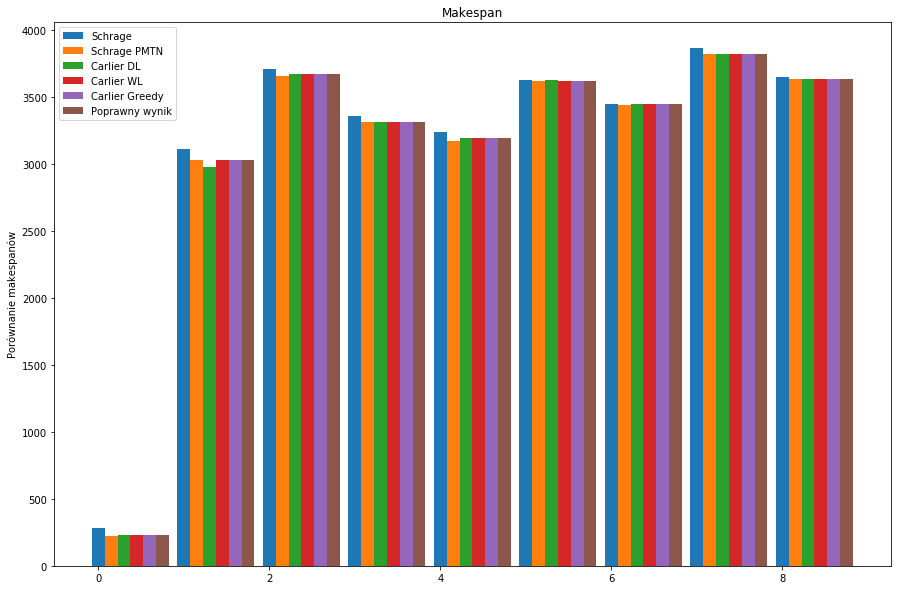

In [43]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]


N = 9
ind = np.arange(N)    # the x locations for the groups
width = 0.15       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, schrage_makespans, width)
p2 = plt.bar(ind+width, schrage_pmtn_makespans, width)
p3 = plt.bar(ind+2*width, deep_left_makespans, width)
p4 = plt.bar(ind+3*width, wide_left_makespans, width)
p5 = plt.bar(ind+4*width, greedy_makespans, width)
p6 = plt.bar(ind+5*width, result_list, width)

plt.ylabel('Porównanie makespanów')
plt.title('Makespan')
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0]), ('Schrage', 'Schrage PMTN', 'Carlier DL', 'Carlier WL', 'Carlier Greedy', 'Poprawny wynik'))

plt.show()

### Porównanie czasów

In [52]:
d = {'Schrage': schrage_times, 'Schrage PMTN': schrage_pmtn_times, 'Carlier DL': deep_left_times, 'Carlier WL': wide_left_times, 'Carlier Greedy': greedy_times}
pd.options.display.float_format = '{:.2f}'.format
table = pd.DataFrame(data=d)
print("PORÓWNANIE CZASÓW")
table

PORÓWNANIE CZASÓW


,Schrage,Schrage PMTN,Carlier DL,Carlier WL,Carlier Greedy
0,2.52,1.18,4.27,1.36,1.45
1,2.46,7.93,383.38,6327.60,56907.11
2,2.35,6.04,266.83,879.78,1521.51
3,2.51,4.76,343.58,909.58,2210.70
4,2.48,5.50,209.94,154.95,173.78
5,4.72,6.75,159.57,1261.05,2013.20
6,2.37,5.72,3.63,4.46,3.59
7,2.69,6.03,169.65,5833.64,54353.74
8,2.59,5.65,107.83,873.45,1081.49


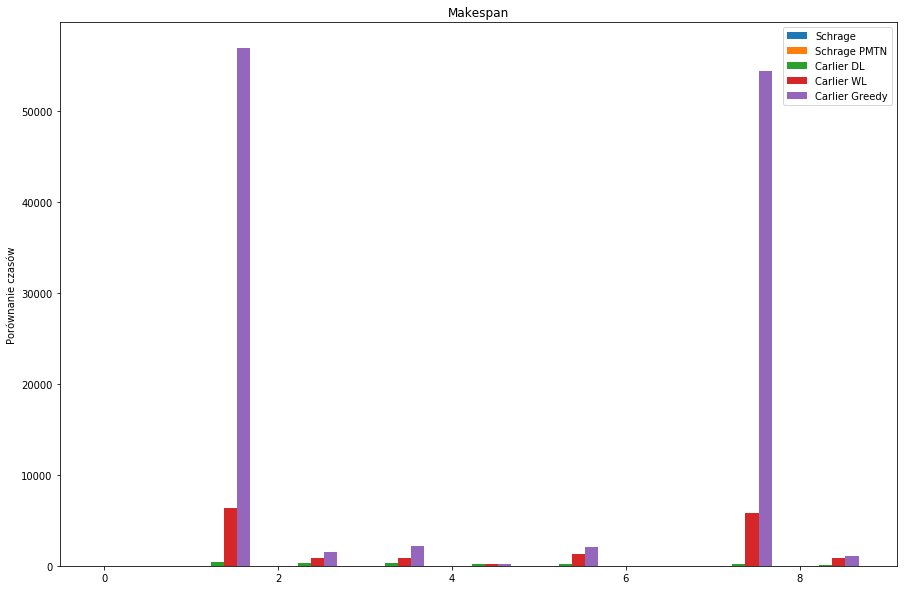

In [68]:
N = 9
ind = np.arange(N)    # the x locations for the groups
width = 0.15       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, schrage_times, width)
p2 = plt.bar(ind+width, schrage_pmtn_times, width)
p3 = plt.bar(ind+2*width, deep_left_times, width)
p4 = plt.bar(ind+3*width, wide_left_times, width)
p5 = plt.bar(ind+4*width, greedy_times, width)

plt.ylabel('Porównanie czasów')
plt.title('Makespan')
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ('Schrage', 'Schrage PMTN', 'Carlier DL', 'Carlier WL', 'Carlier Greedy'))

plt.show()

__Strategie__
- Strategia Wideleft przeszukuje drzewo rozwiązań od lewej do prawej strony na danym poziomie, nie zagłębiając się w dół. Odkryte węzły przechowywane są w tablicy i po sprawdzeniu są one usuwane. 
- Strategia Deepleft również idzie od lewej strony, ale nie pozostaje na jednym poziomie, tylko schodzi maksymalnie w dół, następnie wraca do góry i dopiero wtedy idzie w prawo.
- Strategia Greedy zapamiętuje węzły potomne i w każdym kroku szuka węzła o najmniejszej wartości LB i sprawdza go. Wadą tej strategii jest szukanie najmniejszego LB przy każdej iteracji.

__Wnioski__
- Carlier w każdym przypadku znajduje lepszą wartość Cmax niż Schrage, jednak wartość ta nigdy nie jest mniejsza niż ta otrzymana przy pomocy czystego Schrage PMTN.
- Strategia Greedy daje takie same wyniki jak WL i DL, jednak ze względu na szukanie najmniejszego LB w każdej iteracji, czasy wykonania algorytmu są zawsze dłuższe.
- Najszybszą strategią jest strategia Deepleft, przy której czas wykonania algorytmu jest znacznie krótszy niż w przypadku Wideleft oraz Greedy.
- Ze względu na złożoność algorytmu Carliera nawet w przypadku strategii Deepleft, czas wykonania algorytmu jest w każdym przypadku gorszy niż Schrage. Wynika to z tego, że Schrage wywoływany jest tylko raz, a Carlier wywołuje Schrage i Schrage PMTN wielokrotnie do liczenia U i LB.

# Carlier na wielu wątkach

In [71]:
difference = []
for i in range(len(deep_left_sequence_times)):
    difference.append(100*(deep_left_sequence_times[i] - deep_left_parallel_times[i])/deep_left_sequence_times[i])

d = {'Sekwencyjny Carlier WL CMAX': deep_left_sequence_makespans, 'Równoległy Carlier WL CMAX': deep_left_parallel_makespans, 'Sekwencyjny Carlier WL CZAS': deep_left_sequence_times, 'Równoległy Carlier WL CZAS': deep_left_parallel_times, 'Różnica w czasie [%]': difference}
pd.options.display.float_format = '{:.0f}'.format
table = pd.DataFrame(data=d)
print("PORÓWNANIE CARLIER SEKWENCYJNY VS. ZRÓWNOLEGLONY")
table

PORÓWNANIE CARLIER SEKWENCYJNY VS. ZRÓWNOLEGLONY


,Sekwencyjny Carlier WL CMAX,Równoległy Carlier WL CMAX,Sekwencyjny Carlier WL CZAS,Równoległy Carlier WL CZAS,Różnica w czasie [%]
0,228,228,6,3,57
1,3026,3026,6995,6990,0
2,3665,3665,673,669,1
3,3309,3309,468,464,1
4,3191,3191,195,190,2
5,3618,3618,1090,1085,0
6,3446,3446,9,4,50
7,3821,3821,5078,5073,0
8,3634,3634,386,382,1


__Zasada działania__
- Zrównoleglono proces generowania węzłów potomnych. Dzięki temu lewa i prawa gałąź drzewa obliczana jest w tym samym czasie, co przyspiesza nieznacznie działanie algorytmu. 

__Wnioski__
- Zrównoleglony algorytm Carliera nigdy nie działa gorzej niż sekwencjyny, jednak w większości przypadów różnice są bardzo niewielkie.
- Dla niektórych instancji zrównoleglony Carlier działał nawet 50% szybciej, co oznacza, że największy wpływ na różnice w czasie mają czasy zadań RPQ, a nie sama ich ilość

# Porównanie czasów

In [106]:
%run timeBenchmark.py

Finished


PORÓWNANIE CZASÓW


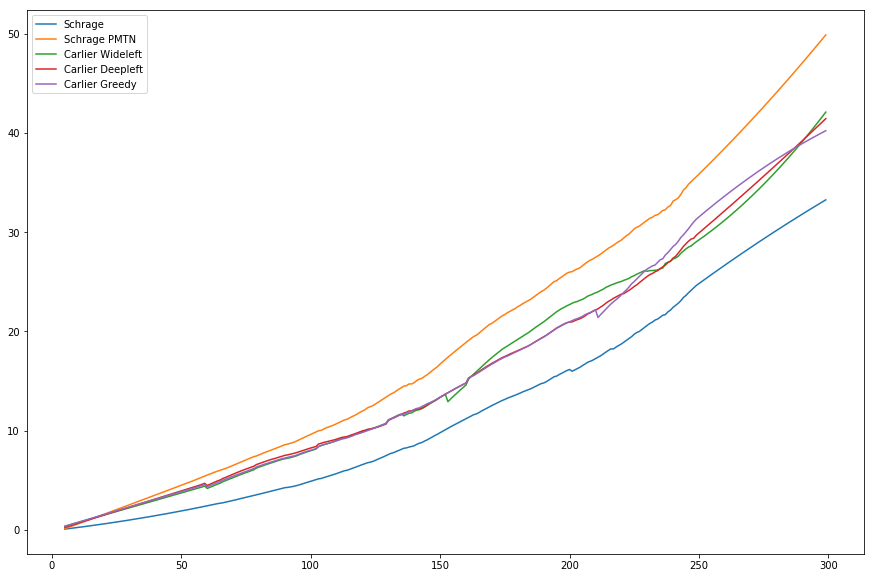

In [109]:
from scipy.signal import savgol_filter

print("PORÓWNANIE CZASÓW")
plt.plot(x, savgol_filter(schrage_times, 101, 2))
plt.plot(x, savgol_filter(schrage_pmtn_times, 101, 2))
plt.plot(x, savgol_filter(wide_left_times, 101, 2))
plt.plot(x, savgol_filter(deep_left_times, 101, 2))
plt.plot(x, savgol_filter(greedy_times, 101, 2))
plt.legend(['Schrage', 'Schrage PMTN', 'Carlier Wideleft', 'Carlier Deepleft', 'Carlier Greedy'])
plt.show()